In [1]:
import pandas as pd
import string
import sys,csv,re

In [2]:
Tweets = pd.read_csv('Tweets_Feb.csv')

In [3]:
Tweets.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,I just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en
1,1,2022-01-31 23:46:52+00:00,1488297761585963012,"فعالیت های اولین دوره کنفرانس فنی بین المللی ""...",sauditvnews_far,0,24 اخبار,fa
2,2,2022-01-31 23:43:36+00:00,1488296939191947267,أضخم مؤتمر تقني في العالم، للبيانات والذكاء ال...,mohadqahtani,8,محمد يحيى القحطاني,ar
3,3,2022-01-31 23:35:21+00:00,1488294865301557251,بأذن الله هحاول اسوي تغطيه للمؤتمر، الحماس واص...,YaznBashraheel,1,Yazn Bashraheel,ar
4,4,2022-01-31 23:34:59+00:00,1488294770111926277,🙏🏼🙏🏼\n#LEAP22 https://t.co/ST6H63J485,iah4b,1,Ahmed,und


In [4]:
Tweets = Tweets.rename(columns={'Tweet ID': 'Tweet Id'})

In [5]:
Tweets.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,I just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en
1,1,2022-01-31 23:46:52+00:00,1488297761585963012,"فعالیت های اولین دوره کنفرانس فنی بین المللی ""...",sauditvnews_far,0,24 اخبار,fa
2,2,2022-01-31 23:43:36+00:00,1488296939191947267,أضخم مؤتمر تقني في العالم، للبيانات والذكاء ال...,mohadqahtani,8,محمد يحيى القحطاني,ar
3,3,2022-01-31 23:35:21+00:00,1488294865301557251,بأذن الله هحاول اسوي تغطيه للمؤتمر، الحماس واص...,YaznBashraheel,1,Yazn Bashraheel,ar
4,4,2022-01-31 23:34:59+00:00,1488294770111926277,🙏🏼🙏🏼\n#LEAP22 https://t.co/ST6H63J485,iah4b,1,Ahmed,und


In [6]:
Tweets.shape

(16079, 8)

In [8]:
Tweets_e = Tweets[Tweets['Language']=='en']

In [9]:
Tweets_e.shape

(9695, 8)

In [10]:
Tweets_e.reset_index(drop=True)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,I just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en
1,6,2022-01-31 23:25:26+00:00,1488292369321582597,@LEAPandInnovate Will the proceedings be strea...,nkosi411,0,Ja Mal,en
2,10,2022-01-31 23:20:02+00:00,1488291010845327360,I just registered for my visitor's pass to att...,gussmoments,1,Ghassan Aljassem 🦄,en
3,11,2022-01-31 23:17:57+00:00,1488290485479292933,"If you saw a kid among the grownups, Just hit ...",_SuperMadio,6,Madio,en
4,12,2022-01-31 23:17:54+00:00,1488290473286504449,"#Master_works Part Of This Event, We Are Few H...",MasterWorks_SA,2,Master Works,en
...,...,...,...,...,...,...,...,...
9690,7485,2021-10-17 11:22:01+00:00,1449697201622560769,"We spoke to @t_alsaraj, a member of the Future...",LEAPandInnovate,1,LEAP,en
9691,7486,2021-10-14 12:37:46+00:00,1448629099388456963,#LEAP22 is a global technology event to reshap...,LEAPandInnovate,11,LEAP,en
9692,7487,2021-10-13 15:32:20+00:00,1448310642000158736,Have you checked out the #LEAP22 agenda yet? W...,LEAPandInnovate,1,LEAP,en
9693,7488,2021-10-11 12:19:02+00:00,1447537222463459330,#LEAP22 is THE global platform and unique even...,LEAPandInnovate,6,LEAP,en


In [11]:
#All LowerCase
Tweets_e['Text'] = Tweets_e['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Tweets_e.head()

/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/1550791929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_e['Text'] = Tweets_e['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,i just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en
6,6,2022-01-31 23:25:26+00:00,1488292369321582597,@leapandinnovate will the proceedings be strea...,nkosi411,0,Ja Mal,en
10,10,2022-01-31 23:20:02+00:00,1488291010845327360,i just registered for my visitor's pass to att...,gussmoments,1,Ghassan Aljassem 🦄,en
11,11,2022-01-31 23:17:57+00:00,1488290485479292933,"if you saw a kid among the grownups, just hit ...",_SuperMadio,6,Madio,en
12,12,2022-01-31 23:17:54+00:00,1488290473286504449,"#master_works part of this event, we are few h...",MasterWorks_SA,2,Master Works,en


In [12]:
#Removing Punctuation
Tweets_e['Text_punc'] = Tweets_e['Text'].str.replace('[^\w\s]','')
Tweets_e.head()

/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/4064735707.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_e['Text_punc'] = Tweets_e['Text'].str.replace('[^\w\s]','')
/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/4064735707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_e['Text_punc'] = Tweets_e['Text'].str.replace('[^\w\s]','')


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_punc
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,i just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en,i just registered for my visitors pass to atte...
6,6,2022-01-31 23:25:26+00:00,1488292369321582597,@leapandinnovate will the proceedings be strea...,nkosi411,0,Ja Mal,en,leapandinnovate will the proceedings be stream...
10,10,2022-01-31 23:20:02+00:00,1488291010845327360,i just registered for my visitor's pass to att...,gussmoments,1,Ghassan Aljassem 🦄,en,i just registered for my visitors pass to atte...
11,11,2022-01-31 23:17:57+00:00,1488290485479292933,"if you saw a kid among the grownups, just hit ...",_SuperMadio,6,Madio,en,if you saw a kid among the grownups just hit h...
12,12,2022-01-31 23:17:54+00:00,1488290473286504449,"#master_works part of this event, we are few h...",MasterWorks_SA,2,Master Works,en,master_works part of this event we are few hou...


In [13]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#stop.append("#leap22")
#stop.append("leap22")
Tweets_e['Text_stop']  = Tweets_e['Text_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Tweets_e.head()

[nltk_data] Downloading package stopwords to /Users/shodz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/3355519681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_e['Text_stop']  = Tweets_e['Text_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))


,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Language,Text_punc,Text_stop
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,i just registered for my visitor's pass to att...,Meshal_binsaeed,0,مشعل بن سعيد,en,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...
6,6,2022-01-31 23:25:26+00:00,1488292369321582597,@leapandinnovate will the proceedings be strea...,nkosi411,0,Ja Mal,en,leapandinnovate will the proceedings be stream...,leapandinnovate proceedings streamed leap22
10,10,2022-01-31 23:20:02+00:00,1488291010845327360,i just registered for my visitor's pass to att...,gussmoments,1,Ghassan Aljassem 🦄,en,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...
11,11,2022-01-31 23:17:57+00:00,1488290485479292933,"if you saw a kid among the grownups, just hit ...",_SuperMadio,6,Madio,en,if you saw a kid among the grownups just hit h...,saw kid among grownups hit shoulder say hi act...
12,12,2022-01-31 23:17:54+00:00,1488290473286504449,"#master_works part of this event, we are few h...",MasterWorks_SA,2,Master Works,en,master_works part of this event we are few hou...,master_works part event hours away leap22 glad...


In [14]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
Tweets_e['Text_tokenized'] = Tweets_e['Text_stop'].apply(lambda x: tokenization(x.lower()))
Tweets_e[['Text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]

/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/3531743235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_e['Text_tokenized'] = Tweets_e['Text_stop'].apply(lambda x: tokenization(x.lower()))


,Text,Text_punc,Text_stop,Text_tokenized
0,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...,"[registered, visitors, pass, attend, leap22, 1..."
6,@leapandinnovate will the proceedings be strea...,leapandinnovate will the proceedings be stream...,leapandinnovate proceedings streamed leap22,"[leapandinnovate, proceedings, streamed, leap22]"
10,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...,"[registered, visitors, pass, attend, leap22, 1..."
11,"if you saw a kid among the grownups, just hit ...",if you saw a kid among the grownups just hit h...,saw kid among grownups hit shoulder say hi act...,"[saw, kid, among, grownups, hit, shoulder, say..."
12,"#master_works part of this event, we are few h...",master_works part of this event we are few hou...,master_works part event hours away leap22 glad...,"[master_works, part, event, hours, away, leap2..."
13,#leap22 excited🤩,leap22 excited,leap22 excited,"[leap22, excited]"
17,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...,"[registered, visitors, pass, attend, leap22, 1..."
19,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...,"[registered, visitors, pass, attend, leap22, 1..."
20,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,registered visitors pass attend leap22 13 febr...,"[registered, visitors, pass, attend, leap22, 1..."


In [16]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word, 
#rather than just stripping the suffices.
#nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

Tweets_e['Text_lemmatized'] = Tweets_e['Text_tokenized'].apply(lambda x: lemmatizer(x))
Tweets_e[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:9]

/var/folders/4g/tyxt36t547j_n6f0ft31746r0000gn/T/ipykernel_17003/1416411314.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets_e['Text_lemmatized'] = Tweets_e['Text_tokenized'].apply(lambda x: lemmatizer(x))


,Text,Text_punc,Text_tokenized,Text_stop,Text_lemmatized
0,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,"[registered, visitors, pass, attend, leap22, 1...",registered visitors pass attend leap22 13 febr...,"[registered, visitor, pas, attend, leap22, 13,..."
6,@leapandinnovate will the proceedings be strea...,leapandinnovate will the proceedings be stream...,"[leapandinnovate, proceedings, streamed, leap22]",leapandinnovate proceedings streamed leap22,"[leapandinnovate, proceeding, streamed, leap22]"
10,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,"[registered, visitors, pass, attend, leap22, 1...",registered visitors pass attend leap22 13 febr...,"[registered, visitor, pas, attend, leap22, 13,..."
11,"if you saw a kid among the grownups, just hit ...",if you saw a kid among the grownups just hit h...,"[saw, kid, among, grownups, hit, shoulder, say...",saw kid among grownups hit shoulder say hi act...,"[saw, kid, among, grownup, hit, shoulder, say,..."
12,"#master_works part of this event, we are few h...",master_works part of this event we are few hou...,"[master_works, part, event, hours, away, leap2...",master_works part event hours away leap22 glad...,"[master_works, part, event, hour, away, leap22..."
13,#leap22 excited🤩,leap22 excited,"[leap22, excited]",leap22 excited,"[leap22, excited]"
17,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,"[registered, visitors, pass, attend, leap22, 1...",registered visitors pass attend leap22 13 febr...,"[registered, visitor, pas, attend, leap22, 13,..."
19,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,"[registered, visitors, pass, attend, leap22, 1...",registered visitors pass attend leap22 13 febr...,"[registered, visitor, pas, attend, leap22, 13,..."
20,i just registered for my visitor's pass to att...,i just registered for my visitors pass to atte...,"[registered, visitors, pass, attend, leap22, 1...",registered visitors pass attend leap22 13 febr...,"[registered, visitor, pas, attend, leap22, 13,..."


In [17]:
Tweets_e.drop(columns=['Text', 'Text_punc', 'Text_tokenized', 'Text_stop', 'Language'])

,Unnamed: 0,Datetime,Tweet Id,Username,Like Count,Display Name,Text_lemmatized
0,0,2022-01-31 23:57:12+00:00,1488300364059262979,Meshal_binsaeed,0,مشعل بن سعيد,"[registered, visitor, pas, attend, leap22, 13,..."
6,6,2022-01-31 23:25:26+00:00,1488292369321582597,nkosi411,0,Ja Mal,"[leapandinnovate, proceeding, streamed, leap22]"
10,10,2022-01-31 23:20:02+00:00,1488291010845327360,gussmoments,1,Ghassan Aljassem 🦄,"[registered, visitor, pas, attend, leap22, 13,..."
11,11,2022-01-31 23:17:57+00:00,1488290485479292933,_SuperMadio,6,Madio,"[saw, kid, among, grownup, hit, shoulder, say,..."
12,12,2022-01-31 23:17:54+00:00,1488290473286504449,MasterWorks_SA,2,Master Works,"[master_works, part, event, hour, away, leap22..."
...,...,...,...,...,...,...,...
16074,7485,2021-10-17 11:22:01+00:00,1449697201622560769,LEAPandInnovate,1,LEAP,"[spoke, t_alsaraj, member, future, work, educa..."
16075,7486,2021-10-14 12:37:46+00:00,1448629099388456963,LEAPandInnovate,11,LEAP,"[leap22, global, technology, event, reshape, w..."
16076,7487,2021-10-13 15:32:20+00:00,1448310642000158736,LEAPandInnovate,1,LEAP,"[checked, leap22, agenda, yet, big, announceme..."
16077,7488,2021-10-11 12:19:02+00:00,1447537222463459330,LEAPandInnovate,6,LEAP,"[leap22, global, platform, unique, event, futu..."


In [18]:
Tweets_e.head()
Tweets_e.to_csv('Tweets_Feb_Cleaned.csv')

In [21]:
 pip install wordcloud

     |████████████████████████████████| 160 kB 414 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


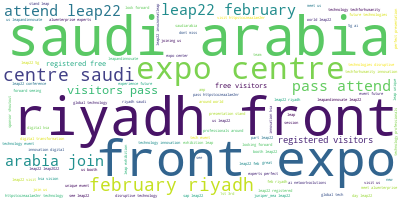

In [28]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(Tweets_e['Text_stop'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000000000000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()